In [166]:
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
df_filename='raw_data.csv'
response_df_filename='last_response.csv'

In [13]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAKc6fAEAAAAAqOiq7%2BH5XPp2x7t1jdhgSq8FLx8%3DtQjUwvSzRe4klrT9oVOGhctQl3aBhoAc1bio73I5ra1R1NA45s'
client = tweepy.Client(bearer_token)
QUERY = '("AI" OR "Artificial Intelligence" OR "ChatGPT" OR "ChatGPT-3" OR "Chat GPT" OR "ChatGPT 3") -sale lang:en -(is:retweet OR is:reply) -(has:hashtags OR has:mentions OR has:links)'

In [74]:
def create_df():
    response = tweepy.Paginator(client.search_recent_tweets, query=QUERY, tweet_fields=['created_at'], max_results=100).flatten(limit=7000)
    twitter_data = []
    
    for tweet in response:
        twitter_data.append([tweet.text, tweet.created_at])

    columns = ['Text', 'Date']

    df = pd.DataFrame(twitter_data, columns=columns)
    
    return df

In [75]:
def clean_text(df):
    i=0
    for text in df['Text']:
        text = re.sub(r'\n\n', ' ', text)
        text = re.sub(r'\n','', text)
        df['Text'][i] = text
        i+= 1
        
    return response_df

In [160]:
def get_new_df(df, response_df):
    df = pd.concat([df, response_df], ignore_index=True)
    df.drop_duplicates(subset=['Text'], ignore_index=True, inplace=True)
    return df

In [152]:
def storage_data(df, filename):
    df.to_csv(filename, index=False)

In [161]:
df = pd.read_csv(df_filename)

In [88]:
response_df = create_df()
response_df = clean_text(response_df)

C:\Users\tonch\AppData\Local\Temp\ipykernel_93956\2329125175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'][i] = text


## Look for anomalies on the new data(bots, biased data).

In [104]:
text = " ".join(text for text in response_df.Text)

In [136]:
def generate_wordcloud(text):
    stopwords = set(STOPWORDS)
    stopwords = stopwords.union(["It", "The", "Artificial Intelligence", "ChatGPT","AI","ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl", "something", "i", "ai", "s", "I", "t", "artificial intelligence", "u", "Chat GPT", "don t", "m", "one", "s"])

    wc = WordCloud(
        background_color='white',
        stopwords=stopwords,
        height = 500,        
        width = 400,
        max_font_size=50,
        max_words=1000
    ).generate(text)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    return wc

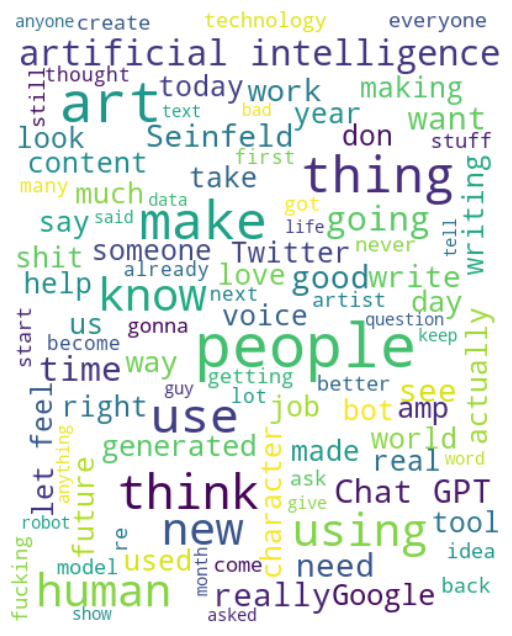

In [132]:
wc = generate_wordcloud(text)

In [117]:
wc.words_.keys()

dict_keys(['people', 'art', 'make', 'thing', 'use', 'think', 'new', 'know', 'human', 'using', 'artificial intelligence', 'going', 'time', 'need', 'want', 'see', 'really', 'Chat GPT', 'good', 'Seinfeld', 'work', 'write', 'way', 'Google', 'generated', 'amp', 'day', 'used', 'us', 'future', 'say', 'job', 'world', 'shit', 'tool', 'year', 'voice', 'take', 'real', 'right', 'made', 'much', 'look', 'someone', 'feel', 'content', 'bot', 'making', 'don', 'actually', 'Twitter', 'let', 'today', 'help', 'love', 'writing', 'character', 'technology', 'never', 'gonna', 'artist', 'create', 'come', 'stuff', 'everyone', 'idea', 'still', 'model', 'ask', 'got', 'getting', 'back', 're', 'fucking', 'better', 'start', 'already', 'many', 'thought', 'next', 'lot', 'become', 'first', 'question', 'give', 'bad', 'tell', 'asked', 'guy', 'said', 'anything', 'text', 'keep', 'robot', 'data', 'word', 'life', 'anyone', 'show', 'month'])

In [126]:
check_list = response_df.Text.str.contains('')

In [127]:
len(response_df[check_list])

100

In [94]:
remove_list = response_df.Text.str.contains('PREMIUM ACCOUNT!')

In [95]:
response_df[remove_list]

,Text,Date
5947,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 13:57:24+00:00
5948,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 13:57:20+00:00
5950,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 13:57:16+00:00
5960,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 13:56:45+00:00
5961,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 13:56:40+00:00
...,...,...
6880,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 12:35:25+00:00
6885,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 12:35:02+00:00
6887,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 12:34:57+00:00
6888,PREMIUM ACCOUNT! -Disney PH-Netflix-VIU-Spotif...,2023-02-03 12:34:54+00:00


In [97]:
response_df.drop(response_df[remove_list].index, inplace=True)

In [100]:
response_df.index = range(0, len(response_df))

In [168]:
response_df.head()

,Text,Date
0,ChatGPT is cool. But soon you'll be able to wr...,2023-02-04 01:28:43+00:00
1,You have got to have the absolute worst self-c...,2023-02-04 01:28:37+00:00
2,ChatGPT is the modern tech version of papal fo...,2023-02-04 01:28:35+00:00
3,ChatGPT can probably churn out believable Link...,2023-02-04 01:28:35+00:00
4,I was playing Genshin earlier and came upon th...,2023-02-04 01:28:27+00:00


## Get the new df with old and actual data

In [129]:
df = get_new_df(df, response_df)

In [167]:
df.head()

,Text,Date
0,i don't think the creator actually knew how to...,2023-01-19 17:59:24+00:00
1,chatgpt!?,2023-01-19 17:59:18+00:00
2,That was never a pen lol ai man,2023-01-19 17:59:18+00:00
3,these ai history things make me laugh so fucki...,2023-01-19 17:59:10+00:00
4,Microsoft used to be best employer and a dream...,2023-01-19 17:58:30+00:00


In [164]:
storage_data(df, df_filename)
storage_data(response_df, response_df_filename)